In [21]:
# !pip install Unidecode
# !pip install fuzzywuzzy


In [22]:
import warnings
warnings.filterwarnings("ignore")

from E_Salary_Cities import *

<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #316B83; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1> State & Refine QS</h1></div>

In [23]:
POSITION="Position"
SALARY="Salary"
CITY='City'
df_2020,df_2019,df_2018=read()
rename_columns(df_2020,df_2019,df_2018)
df_merged=merge([df_2020,df_2019,df_2018],common_columns=[POSITION,SALARY,CITY])
df_merged.head()

,Position,Salary,City
0,Software Engineer,80000.0,Munich
1,Backend Developer,80000.0,Berlin
2,Software Engineer,120000.0,Berlin
3,Frontend Developer,54000.0,Berlin
4,Backend Developer,62000.0,Berlin


> #### _`QS:How the salary for the same position varies from city to another`_
>|Set Expectation | Collect Info | Match Results| 
>|----|----|----|
>| There exists different cities in EU for a valid question  |See the Columns in our dataset |_`Matches`_ as there are different Cities & positions in our dataset & the salary is provided |


<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #316B83; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1> Explore Data</h1></div>

> ***
> ### _`Some Data Cleaning`_
> ***

In [24]:
print("Nulls in  our dataset is distributed as follows:")
print(df_merged.isna().sum())

Nulls in  our dataset is distributed as follows:
Position    35
Salary      16
City        29
dtype: int64


In [25]:
print('There Exists {} record before Cleaning'.format(df_merged.shape[0]))
df_cleaned=df_merged.dropna(inplace=False)
print('There Exists {} record after Dropping Nan'.format(df_cleaned.shape[0]))

There Exists 3009 record before Cleaning
There Exists 2954 record after Dropping Nan


In [26]:
print('Before cleaning: There Exits {}  unique city in our dataset '.format(df_cleaned[CITY].nunique()))
df_cleaned=clean_cities(df_cleaned,filter=10)
print('After cleaning: There Exits {}  unique city in our dataset '.format(df_cleaned[CITY].nunique()))

Before cleaning: There Exits 182  unique city in our dataset 
After cleaning: There Exits 16  unique city in our dataset 


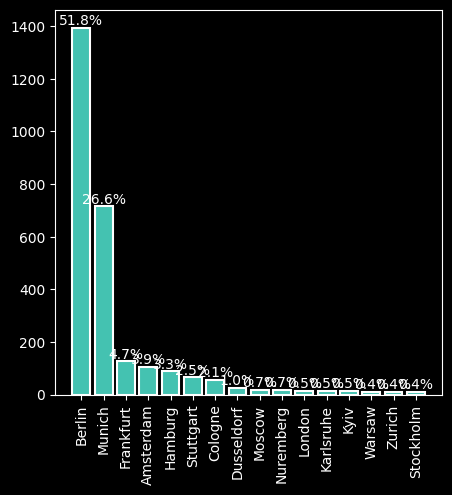

In [27]:
plot_single_histogram(df_cleaned,CITY)

> ***
> ### _`Interpretations:`_
> - _`Most of the cities lie in Germany as states in the dataset collection`_ 
> - _`After filtering , all the cities are in EU continetnt`_
> - _`Berlin , which is the capital of Germany, has the most records which does make sense`_
> - _`Some cities ,which has very minor count,could be of less use especially after grouping by the position`_
> ***

In [28]:
print('There Exits {}  unique position in our dataset'.format(df_cleaned[POSITION].nunique()))
df_cleaned=clean_positions(df_cleaned)
print('There Exits {}  unique position in our dataset'.format(df_cleaned[POSITION].nunique()))

There Exits 474  unique position in our dataset
There Exits 13  unique position in our dataset


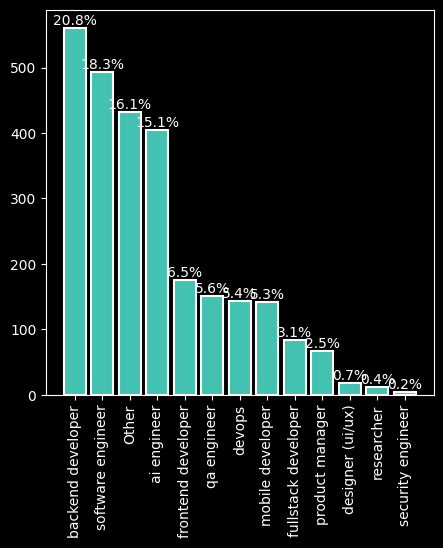

In [29]:
plot_single_histogram(df_cleaned,POSITION)

> ***
> ### _`Interpretations:`_
> - _`After Quite A while classifying the job positions into discrete specific positions , it seems , by eye, that the majority are logically & correctly classifiea`_ 
>- _`Very minor population that fall under the OTHER sector`_ 
>- _`No filter was done here to drop rows of low count;however, that could be done later if their frequency after grouping is low`_ 
> ***

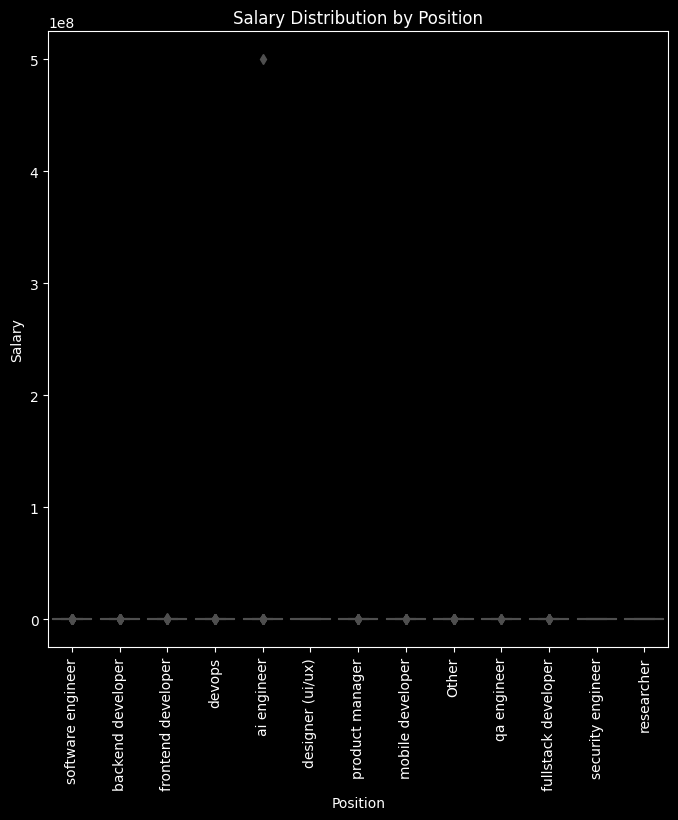

In [30]:
plot_box_plot(df_cleaned,POSITION,SALARY, x_label=POSITION, y_label=SALARY, title='Salary Distribution by Position')

> ***
> - _`It seems that there is illogical OUTLIERS `_ 
> ***

In [31]:
print('There Exits {}  rows before outlier removal'.format(len(df_cleaned)))
df_cleaned = df_cleaned.groupby(POSITION).apply(remove_outliers, column=SALARY)
print('There Exits {}  rows after outlier removal'.format(len(df_cleaned)))

There Exits 2688  rows before outlier removal
There Exits 2551  rows after outlier removal


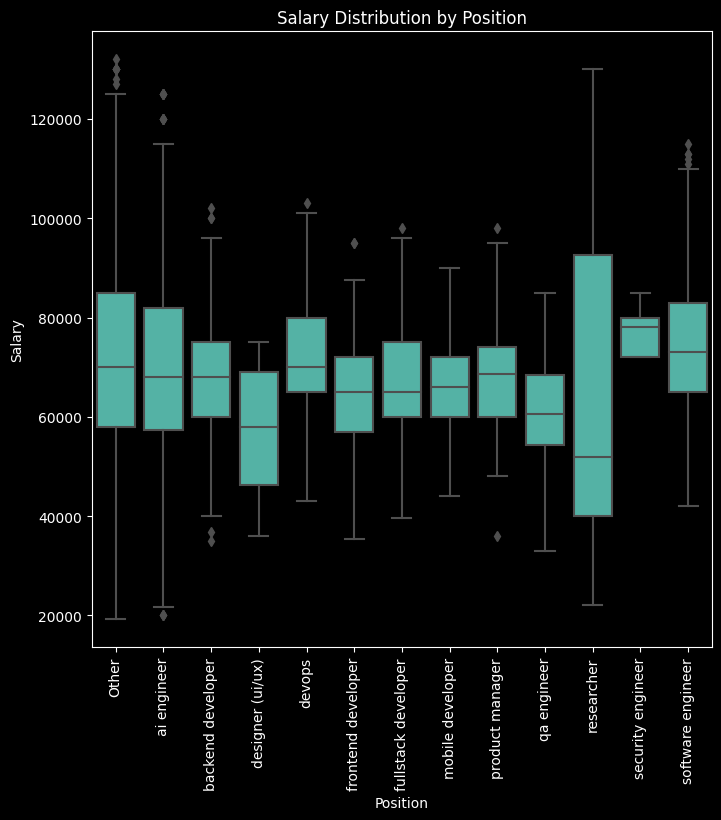

In [32]:
plot_box_plot(df_cleaned,POSITION,SALARY, x_label=POSITION, y_label=SALARY, title='Salary Distribution by Position')

> ***
> ### _`Interpretations:`_
> - _`It seems that there are some positions with minor difference in their average salary mostly between 60-80k on average `_
> -  _`The Researcher seemed to exceed this predefined common average `_
> -  _`Some positions such as {ML Engineer ,Data Scientists  , Product Manager} have high variance`_
> ***

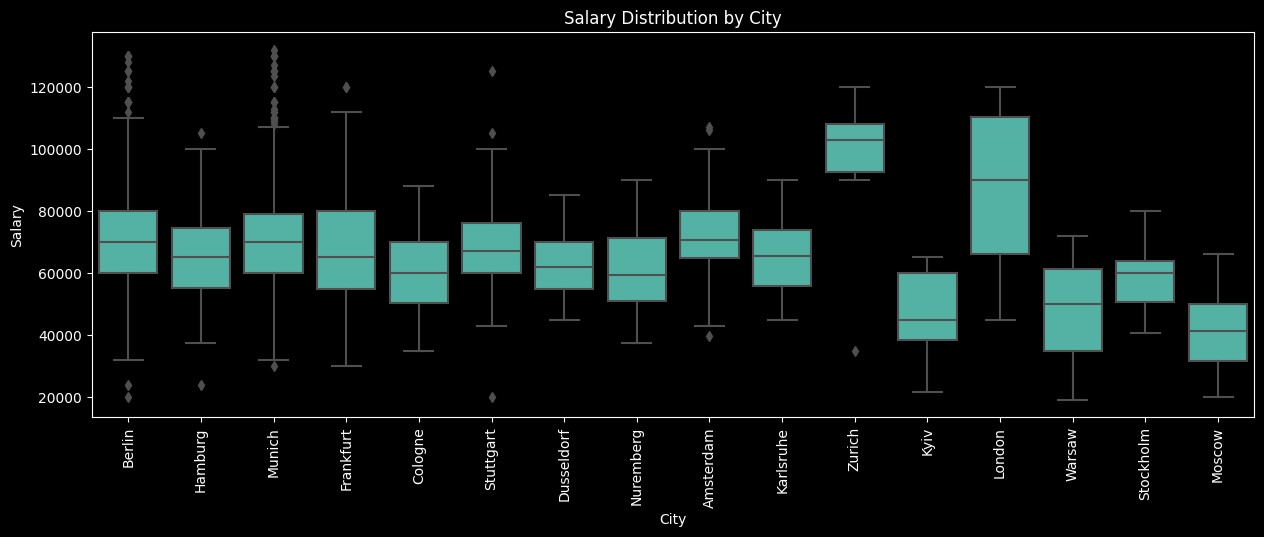

In [33]:
def plot_box_plot(df, x_col, y_col, x_label, y_label, title):
    # Set the background color to black
    plt.style.use('dark_background')
    
    # Plot the box plot
    plt.figure(figsize=(15, 5))
    sns.boxplot(data=df, x=x_col, y=y_col, color='#44c2b1')
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.xticks(rotation=90)
    plt.show()

# plt.figure(figsize=(15,5))
plot_box_plot(df_cleaned,CITY,SALARY, x_label=CITY, y_label=SALARY, title='Salary Distribution by City')

> ***
> ### _`Interpretations:`_
> - _`Berlin showed a very big variance in the salary, maybe this due to the difference in the salary of  positions  `_
> -  _`Zurich Seems to have the highest average salary regardless the position `_
> -  _`Meanwhile Moscow seems to have the least Salary`_
> ***

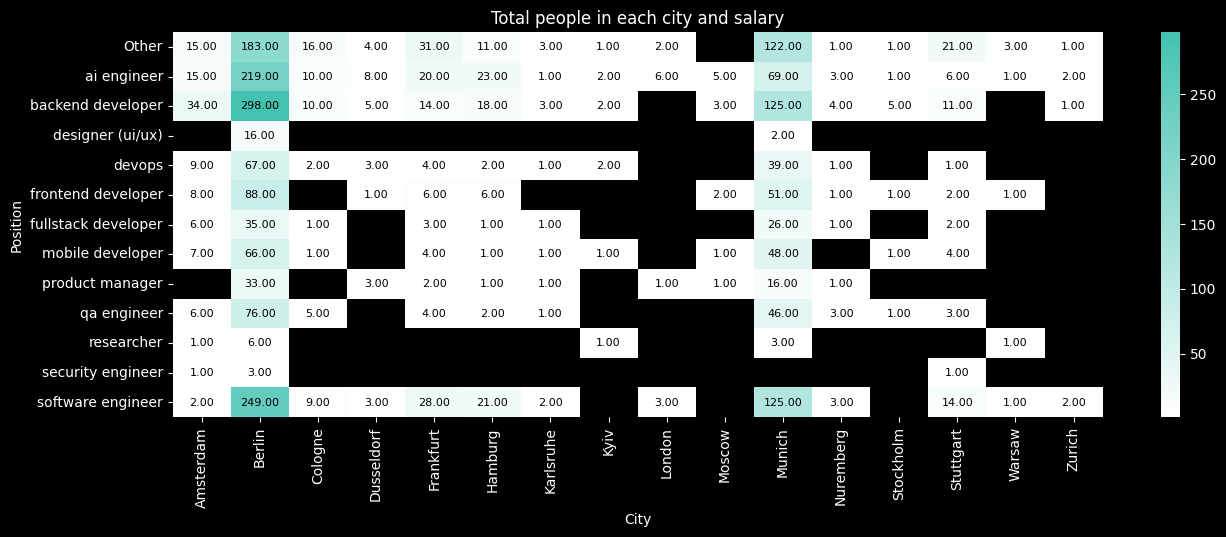

In [34]:
plot_heatmap(df=df_cleaned,x=CITY,y=POSITION,value=SALARY,title="Total people in each city and salary",x_label='City',y_label='Position',aggfunc='count')

> ***
> ### _`Interpretations:`_
> - _`It is seen that the frequency after grouping the position & city is niche in some combinations e.g London seems to have 1,2,4 people in its available positions which would reflect a non statistcal significnce for the enitre population  `_
> - _`We can see  that that happened for cities that has a very low frequency in the 1st histogram we drew. E.g: Zurich and London were below 20 people`_
> - _`Should drop those that will cause  statistically insignificant results`_
> ***

In [35]:
print('There Exits {}  rows before filtering'.format(len(df_cleaned)))
threshold = 9
# Group the rows by position and city and filter groups with size below the threshold
df_cleaned = df_cleaned.reset_index(drop=True).groupby([POSITION, CITY]).filter(lambda x: len(x) >= threshold)
print('There Exits {}  rows after filtering'.format(len(df_cleaned)))



There Exits 2551  rows before filtering
There Exits 2327  rows after filtering


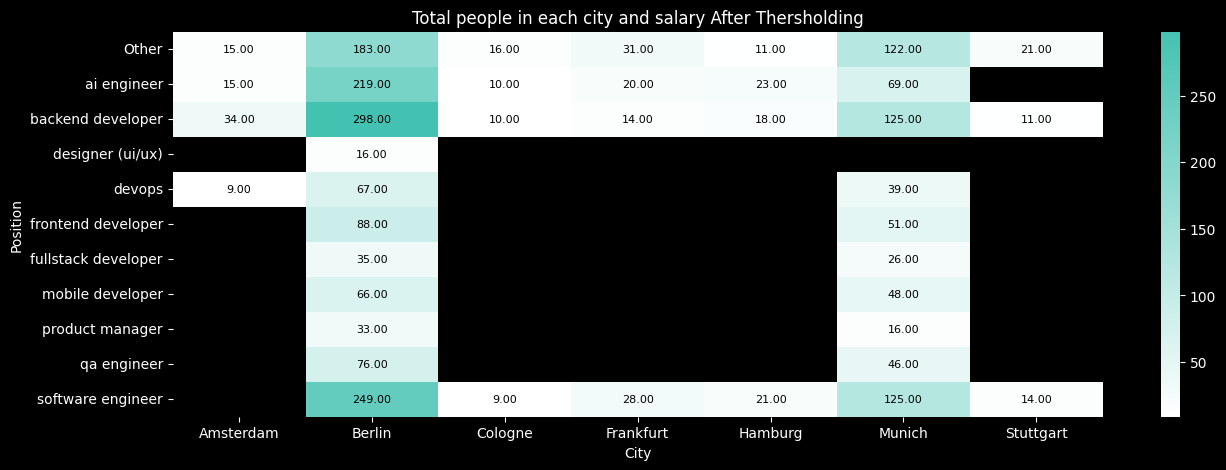

In [36]:
plot_heatmap(df=df_cleaned,x=CITY,y=POSITION,value=SALARY,title="Total people in each city and salary After Thersholding",x_label='City',y_label='Position',aggfunc='count')

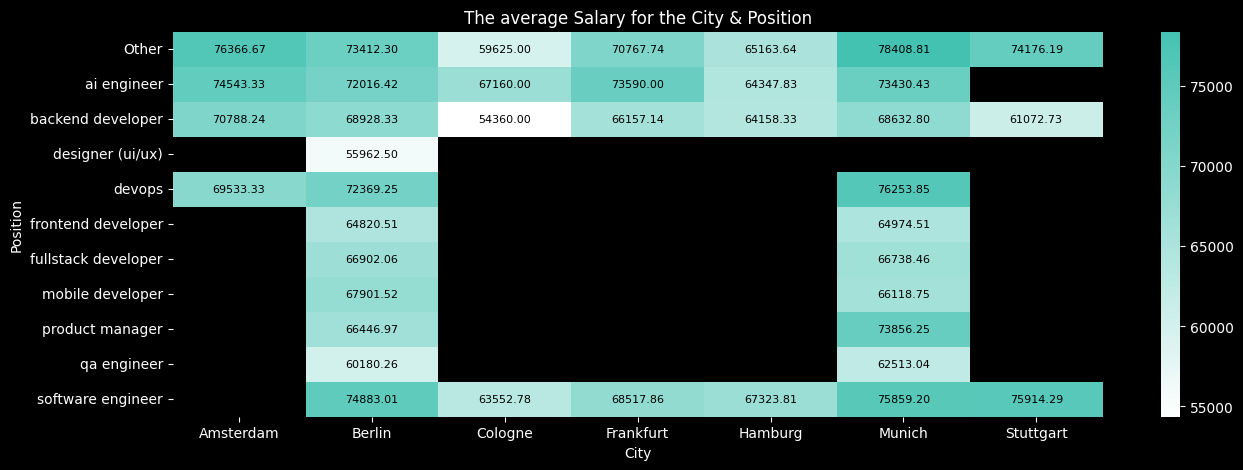

In [37]:
plot_heatmap(df=df_cleaned,x=CITY,y=POSITION,value=SALARY,title="The average Salary for the City & Position",x_label=CITY,y_label=POSITION)

> ***
> ### _`Interpretations:`_
> - _`It seems that For some positions , indeed, the salary varies from a city to another For example:`_
>> - _`Researcher in Munich seems to be paid more than in Berlin on average`_
>> - _`In Amesterdam it seems  that it is the highest paid for Datascientists`_
> - _`ML seems to be high regardless of city`_
> - _`Now it is time to prove that statistically`_
> ***

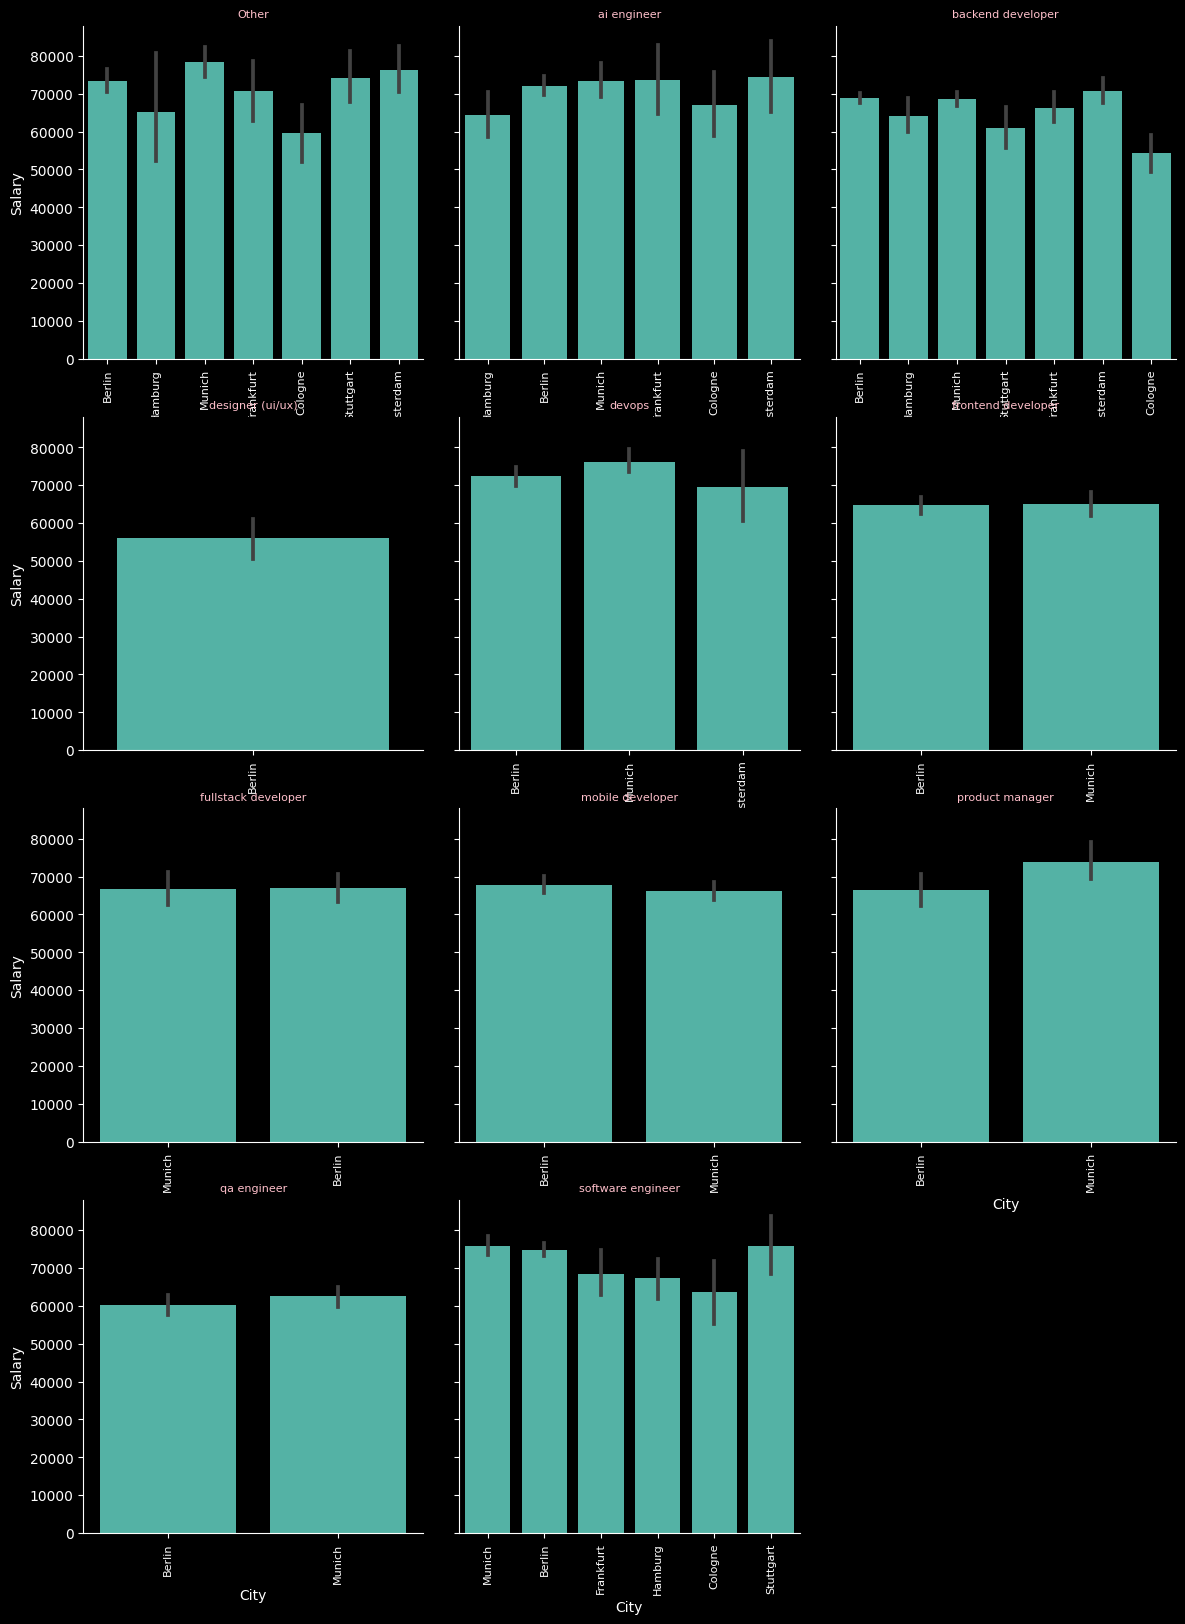

In [38]:
plot_grid_of_bar_chart(df_cleaned,POSITION,CITY,SALARY)

>|Set Expectation | Collect Info | Match Results| 
>|----|----|----|
>| Enough Cities  with frequent records in each city for the question to be answerable | Several plots about the City Column | _`Matches`_ the expectations after dropping certain niche values this is due to the variety in cities that were provided |

<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #316B83; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1> Build Models</h1></div>

> ***
> $ \eta^{2} = \frac  {\sigma ^{2}_{y^{-}}} {\sigma^{2}_{y}} $
> where:
> - $\eta^{2}$ : correlation ratio
> - $ {\sigma ^{2}_{y^{-}}} $ : is standard deviation between the groups e.g {Munich, Berlin..etc}
> - $ {\sigma^{2}_{y}} $ : is the standrd deviation within the group {salary in Berlin itself has a lot of variance} + between groups
>
>In other simple words it is : $ correlationRatio = \frac  {betweenGroups} {betweenGroups+withinGroup} $
>
>`* The bigger the correlation ratio ~1 the more we can say that the variation is due to difference in difference between groups.In our case it will be due the differenece in salary between cities such as Munich & Berlin .. `
>
>`*  The smaller the correlation ratio the more we can say it is difference within the groups. In our case, the Variation in salaries in the city itself is big rather than having significant difference between the cities `
> ***

In [39]:
df_position_ratio=correlation_ratio(df_cleaned)
df_position_ratio.sort_values(by='Correlation Ratio', ascending=False)

,Position,Correlation Ratio
8,product manager,0.077359
2,backend developer,0.047045
4,devops,0.040272
10,software engineer,0.037797
0,Other,0.036599
1,ai engineer,0.014701
9,qa engineer,0.011835
7,mobile developer,0.009576
6,fullstack developer,0.000050
5,frontend developer,0.000047


> ***
> ### _`Interpretations:`_
> - _`Overall it seems that there is weak relation between the city & the salary, So mostly all the cities for the same position are quite close to each other in terms of salary`_
> - _`Designer, Security Engineer, Other  having correlation coeff=0 means that there is NO difference in the mean of the salary between the different cities. That was expected because as we see that these 3 positions have only 1 city so the difference is all due to within_group term `_
> - _`Researcher seems to have the highest correlation among them all , which was also expected as we have seen from the heatmap it had the highest value of difference`_
>
>
> ***

>|Set Expectation | Collect Info | Match Results| 
>|----|----|----|
>|Finding Kind of variation in the payment/salary for the same position from city to another | Used the correlation ratio to give me the drgree of between_groups variation | _`Didnot Match`_ When inspecting we can say that ALL the cities except Amesterdam are in Germany and All in the EU region which could have a close salary for the same position. If it was in different continent maybe it would be a signoficant result|

<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #316B83; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1> Interpret Results</h1></div>

<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #316B83; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1> Communicate Results</h1></div>